In [2]:
from functools import cache
import pandas as pd
import numpy as np
import os
import file_config as fc
import matplotlib.pyplot as plt
import tushare as ts
pro = ts.pro_api('20240223173636-e85e0671-a8d9-48ab-a35a-f9a86e6a43d5')
pro._DataApi__http_url = 'http://tsapi.majors.ltd:7000'

In [44]:
pro.index_daily(ts_code='000985.SH').to_csv('000985.SH.csv')

In [43]:
pro.index_daily(ts_code='000905.SH').to_csv('000905.SH.csv')
pro.index_daily(ts_code='000852.SH').to_csv('000852.SH.csv')


ConnectionError: HTTPConnectionPool(host='tsapi.majors.ltd', port=7000): Read timed out.

In [5]:
pd.read_csv(os.path.join(fc.ROOT_DIR, 'trade_cal.csv'))

,exchange,cal_date,is_open,pretrade_date
0,SSE,20241231,1,20241230
1,SSE,20241230,1,20241227
2,SSE,20241229,0,20241227
3,SSE,20241228,0,20241227
4,SSE,20241227,1,20241226
...,...,...,...,...
5474,SSE,20100105,1,20100104
5475,SSE,20100104,1,20091231
5476,SSE,20100103,0,20091231
5477,SSE,20100102,0,20091231


# get factor data

In [6]:
def get_factor(year_list:list):
    for year in year_list:
        if not os.path.exists(os.path.join(fc.FACTOR_DIR, f'factor_{year}.parquet')):
            raise FileNotFoundError(f'factor_{year}.parquet not found')
    return pd.concat([pd.read_parquet(os.path.join(fc.FACTOR_DIR, f'factor_{year}.parquet')) for year in year_list])

def get_price(stock_list:list, start_date:str, end_date:str):
    date_list = pd.date_range(start_date, end_date).strftime('%Y%m%d')
    year_list = pd.date_range(start_date, end_date).year.unique().tolist()

    # load factors
    factor = get_factor(year_list)

    # keep desired stocks and dates
    price = factor.loc[(factor.Symbol.isin(stock_list)) & (factor.Date.isin(date_list)), ['Symbol', 'Date', 'AdjVWAP']]
    return price.pivot(index='Date', columns='Symbol', values='AdjVWAP')

In [11]:
def get_index_price(index:str, start_date:str, end_date:str, field:str='close'):
    index_list = ['000300.SH', '000905.SH', '000852.SH', '000985.SH']
    if index not in index_list:
        print(f'pleace select from {index_list}')
    
    index = pd.read_csv(f'000300.SH.csv')[['ts_code', 'trade_date', field]]
    index['trade_date'] = pd.to_datetime(index['trade_date'], format='%Y%m%d')
    index = index.loc[(index.trade_date >= start_date) & (index.trade_date <= end_date), ['ts_code','trade_date', 'close']]
    return index.pivot(index='trade_date', columns='ts_code', values=field)

get_index_price('000300.SH', '20211031' , '20211231')

ts_code,000300.SH
trade_date,
2021-11-01,4890.6851
2021-11-02,4839.8457
2021-11-03,4821.1119
2021-11-04,4868.7419
2021-11-05,4842.3458
2021-11-08,4848.1795
2021-11-09,4846.7444
2021-11-10,4821.1925
2021-11-11,4898.6529


In [3]:
pd.read_csv(f'000300.SH.csv')[['ts_code', 'trade_date', field]]

,Unnamed: 0,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,0,000300.SH,20241028,3964.1569,3953.1063,3964.1569,3917.2042,3956.4210,7.7359,0.1955,2.161604e+08,3.904502e+08
1,1,000300.SH,20241025,3956.4210,3931.3205,3992.8918,3921.9396,3928.8334,27.5876,0.7022,2.106949e+08,4.122314e+08
2,2,000300.SH,20241024,3928.8334,3950.8987,3957.9832,3914.0887,3973.2089,-44.3755,-1.1169,1.747241e+08,3.404869e+08
3,3,000300.SH,20241023,3973.2089,3955.3191,4012.1795,3939.0986,3957.7755,15.4334,0.3900,2.458739e+08,4.691208e+08
4,4,000300.SH,20241022,3957.7755,3923.7443,3965.9084,3917.5218,3935.1974,22.5781,0.5737,2.234334e+08,4.428818e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
4807,4807,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
4808,4808,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
4809,4809,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
4810,4810,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06


# get index data

In [38]:
idx_300 = pd.read_parquet(os.path.join(fc.BARR_DIR, 'idx__csi300_weight.parquet'))
# idx_300 = pd.pivot_table(idx_300, index='Date', columns='Symbol', values='Weight')
idx_300

,IndexSymbol,Date,Symbol,I_WEIGHT,SEQ_NUM,Weight
0,000300.SH,20100824,000001.SZ,1.1190,1,0.011191
1,000300.SH,20100824,000002.SZ,1.6920,2,0.016921
2,000300.SH,20100824,000009.SZ,0.2500,3,0.002500
3,000300.SH,20100824,000012.SZ,0.2350,4,0.002350
4,000300.SH,20100824,000021.SZ,0.1710,5,0.001710
...,...,...,...,...,...,...
1031395,000300.SH,20241023,688303.SH,0.0836,296,0.000836
1031396,000300.SH,20241023,688363.SH,0.0580,297,0.000580
1031397,000300.SH,20241023,688396.SH,0.1378,298,0.001378
1031398,000300.SH,20241023,688599.SH,0.1358,299,0.001358


In [25]:
idx_300.sum(axis=1)

Date
20100824    1.0
20100825    1.0
20100826    1.0
20100827    1.0
20100830    1.0
           ... 
20240930    1.0
20241008    1.0
20241009    1.0
20241010    1.0
20241011    1.0
Length: 3430, dtype: float64

In [8]:
stock_list = idx_300.columns.tolist()
start_date = idx_300.index.min()
end_date = idx_300.index.max()

price = get_price(stock_list, start_date, end_date)
price

Symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000021.SZ,000024.SZ,000027.SZ,000031.SZ,000039.SZ,...,688187.SH,688223.SH,688256.SH,688271.SH,688303.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
Date,,,,,,,,,,,,,,,,,,,,,
20100824,642.910172,984.338889,29.636567,43.170705,219.826610,166.397905,101.058592,70.904218,104.661551,305.251757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100825,642.910172,966.860481,29.840743,42.012250,223.670559,163.811702,97.829661,68.524242,102.554254,292.414187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100826,642.910172,959.618421,30.261227,41.128938,223.754246,159.711405,96.637828,67.874198,101.453630,291.414198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100827,642.910172,945.863674,31.768056,41.045751,215.868253,162.607299,95.522858,67.413021,102.023098,291.779531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100830,642.910172,940.440505,31.844905,42.803315,224.352663,167.134219,95.319104,68.476384,102.780841,297.460119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240930,1489.330907,1752.940204,52.742212,85.157914,170.219702,234.393192,NaN,123.251778,48.183901,449.494024,...,53.279768,8.587863,270.012180,123.836243,27.692638,68.818208,44.921594,30.369463,22.474065,57.249164
20241008,1614.385579,1872.507773,56.610831,92.515360,181.190172,262.454843,NaN,137.297930,51.074662,469.915668,...,61.770177,10.507659,345.033027,142.559210,32.986634,81.064019,57.053259,37.341008,27.129477,71.839676
20241009,1514.896001,1713.946870,52.819226,89.117213,169.181485,258.394338,NaN,134.993238,46.129474,443.936697,...,58.054568,10.055813,367.242859,134.795326,31.834231,72.550039,60.871790,36.633305,25.063601,81.302010


In [17]:
# calculate weighted price
idx_300 = idx_300.loc[price.index]
idx_300

Symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000021.SZ,000024.SZ,000027.SZ,000031.SZ,000039.SZ,...,688187.SH,688223.SH,688256.SH,688271.SH,688303.SH,688363.SH,688396.SH,688561.SH,688599.SH,688981.SH
Date,,,,,,,,,,,,,,,,,,,,,
20100824,0.011191,0.016921,NaN,0.00250,0.00235,0.00171,0.00280,0.00151,0.00143,0.00254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100825,0.011129,0.017538,NaN,0.00250,0.00236,0.00175,0.00289,0.00150,0.00145,0.00254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100826,0.011400,0.017260,NaN,0.00244,0.00244,0.00173,0.00279,0.00148,0.00145,0.00248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100827,0.011381,0.017281,NaN,0.00242,0.00242,0.00171,0.00280,0.00147,0.00144,0.00249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100830,0.011340,0.017039,NaN,0.00241,0.00236,0.00175,0.00275,0.00147,0.00146,0.00249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240930,0.005832,0.003167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000647,0.001559,0.002642,0.001995,0.000759,0.000607,0.001110,NaN,0.001080,0.005193
20241008,0.005748,0.003210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000671,0.001711,0.002922,0.002047,0.000818,0.000659,0.001211,NaN,0.001185,0.005744
20241009,0.005724,0.003236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000725,0.001932,0.003310,0.002107,0.000883,0.000710,0.001372,NaN,0.001306,0.006507


In [31]:
# multiply price by weight of each line and calculate the sum
price = price[idx_300.columns]
price['index_price']= (price * idx_300).sum(axis=1)



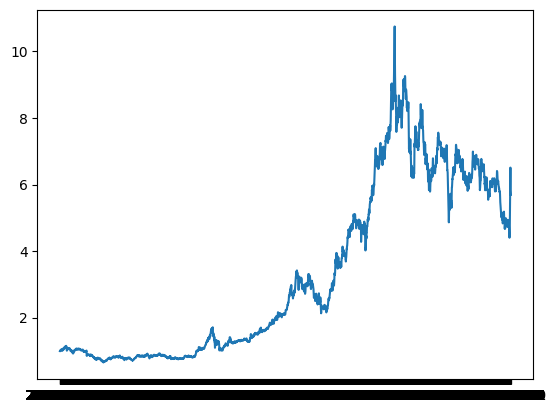

In [37]:
price['return'] = price['index_price'].pct_change()

plt.plot((price['return']+1).cumprod())

In [62]:
stock_list = ['000985.SZ']
start_date = '20120101'
end_date = '20141231'
date_list = pd.date_range(start_date, end_date).strftime('%Y%m%d')
year_list = pd.date_range(start_date, end_date).year.unique().tolist()

# load factors
factor = get_factor(year_list)


# keep desired stocks and dates
# price = factor.loc[(factor.Symbol.isin(stock_list)) & (factor.Date.isin(date_list)), ['Symbol', 'Date', 'AdjVWAP']]

,Symbol,Date,AdjVWAP,F_1,F_2,F_3,F_4,F_5,F_6,F_7,...,F_114,F_115,F_116,F_117,F_118,F_119,F_120,F_121,F_122,F_123
0,000001.SZ,20120104,552.413096,-0.319896,-0.490802,-0.627876,0.000000e+00,0.0,0.0,0.000000,...,0.310621,0.016735,-0.010535,0.0,0.362707,0.248133,0.462206,0.925547,-0.162387,0.630606
1,000001.SZ,20120105,552.941256,-0.441859,-0.407582,-0.607766,0.000000e+00,0.0,0.0,0.000000,...,0.313086,-0.065699,-0.014884,0.0,0.295396,0.190756,0.408170,-0.072043,0.025557,0.700203
2,000001.SZ,20120106,550.493707,-0.545012,-0.441253,-0.687050,0.000000e+00,0.0,0.0,0.000000,...,0.286154,-0.179897,-0.026940,0.0,0.241641,0.145773,0.349331,-0.650324,-0.439245,0.393798
3,000001.SZ,20120109,561.688879,-0.365154,-0.588329,-0.550717,0.000000e+00,0.0,0.0,0.000000,...,0.319169,-0.363422,-0.037476,0.0,0.375185,0.268762,0.419350,0.000000,-0.612795,0.770755
4,000001.SZ,20120110,561.688879,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620063,603998.SH,20141225,34.870290,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.129636,0.000000,0.000000
620064,603998.SH,20141226,34.739986,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.261808,0.000000,0.000000
620065,603998.SH,20141229,34.040751,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.362070,0.000000,0.000000
620066,603998.SH,20141230,37.298007,0.218749,0.000000,0.000000,0.000000e+00,0.0,0.0,0.176155,...,0.000000,0.000000,0.000000,0.0,0.035055,0.000000,0.000000,0.838858,0.000000,0.000000


In [69]:
stock_list = ['000852.SZ']
factor.loc[factor.Symbol.str.contains('000852'), ['Symbol', 'Date', 'AdjVWAP']]

,Symbol,Date,AdjVWAP
87480,000852.SZ,20120104,31.298601
87481,000852.SZ,20120105,30.691544
87482,000852.SZ,20120106,31.081699
87483,000852.SZ,20120109,32.697495
87484,000852.SZ,20120110,33.317936
...,...,...,...
87460,000852.SZ,20141225,71.744395
87461,000852.SZ,20141226,71.102822
87462,000852.SZ,20141229,69.029565
87463,000852.SZ,20141230,66.209345


In [65]:
list = [sym[:6] for sym in factor.Symbol.unique()]
# check whether 000985 is in the list
'000985' in list

True

In [61]:
stock_list = ['000985.SH']
start_date = '20120101'
end_date = '20141231'

def get_price(stock_list:list, start_date:str, end_date:str):
    date_list = pd.date_range(start_date, end_date).strftime('%Y%m%d')
    year_list = pd.date_range(start_date, end_date).year.unique().tolist()

    # load factors
    factor = get_factor(year_list)

    # keep desired stocks and dates
    price = factor.loc[(factor.Symbol.isin(stock_list)) & (factor.Date.isin(date_list)), ['Symbol', 'Date', 'AdjVWAP']]
    return price.pivot(index='Date', columns='Symbol', values='AdjVWAP')


get_price(stock_list, start_date, end_date).pct_change().dropna(how = 'all')


Symbol
Date


In [60]:
date = '20231201'
days_ago = 252
trade_cal = pd.read_csv(os.path.join(fc.ROOT_DIR, 'trade_cal.csv'))
trade_cal = trade_cal.loc[trade_cal.is_open == 1, 'cal_date']

return str(trade_cal[trade_cal <= int(date)].iloc[-days_ago])

np.int64(20110117)